# 1. Загрузка данных

In [366]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing

In [367]:
df_housing = fetch_california_housing(as_frame=True)['frame']
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [368]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# 2. Первичный анализ данных

## 2.1. Проверка на пропуски

In [369]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [370]:
0 in df_housing.values

False

Пропусков и нулевых значений в датафрейме нет.

## 2.2. Нормализация данных

In [371]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [372]:
min_value = df_housing['Population'].min()
max_value = df_housing['Population'].max()

df_housing['Population'] = (df_housing['Population'] - min_value) / (max_value - min_value)
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422


# 3. Разделение выборки на train и test

In [373]:
X = df_housing.drop(['MedHouseVal'], axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25


In [374]:
y = df_housing['MedHouseVal']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели линейной регрессии

In [376]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# 5. Расчет score

In [377]:
print(f'train: {model.score(X_train, y_train)}\ntest: {model.score(X_test, y_test)}')

train: 0.6125511913966952
test: 0.575787706032451


# 6. Обучение дерева решений (max_depth = 1)

In [378]:
def get_tree(X, y, depth=None, msl=1):
  reg = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=msl, random_state=42).fit(X, y)
  return reg

In [379]:
def get_predict(X_test, reg):
  pred = reg.predict(X_test)
  return pred

In [380]:
def get_plot(reg, depth, columns, figsize):

  if depth < 4:
    fig = plt.figure(figsize=figsize)
    tree.plot_tree(reg, feature_names=columns, filled=True)
    plt.title(f'max_depth = {depth}')
    plt.show()
  else:
    print(f'max_depth = {depth}\n\n{tree.export_text(reg)}')

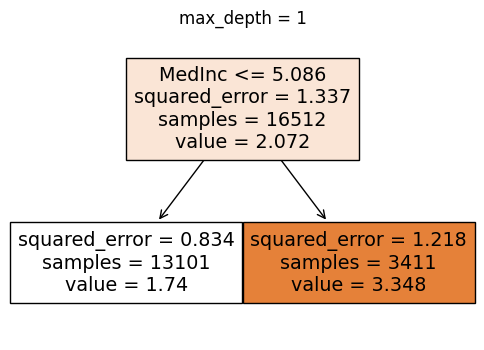

In [381]:
depth = 1

reg = get_tree(X_train, y_train, depth)
get_plot(reg, depth, df_housing.columns, (6, 4))

In [382]:
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 0.316996626635902
test: 0.27951121634638143


При глубине дерева, равной 1, точность для тестовой выборки = 0.28 - модель предсказывает плохо.

# 7. Обучение дерева решений

## 7.1. max_depth = 2

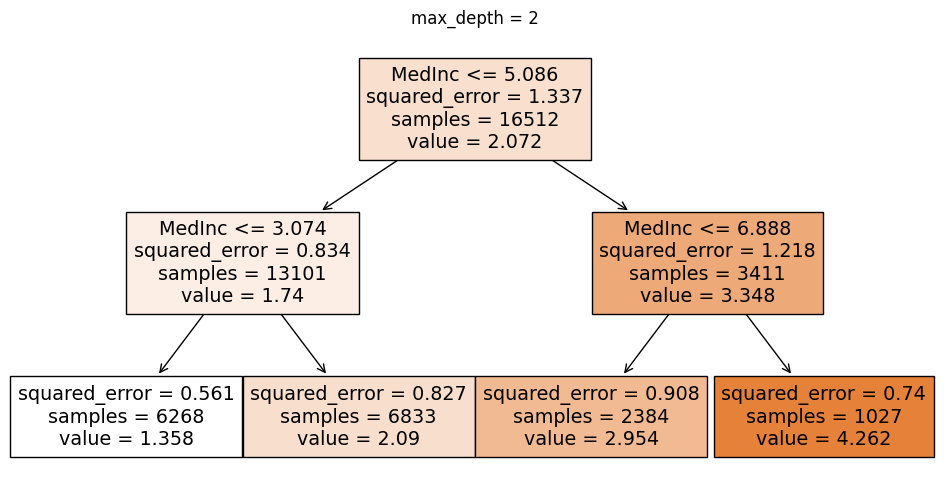

In [383]:
depth = 2

reg = get_tree(X_train, y_train, depth)
get_plot(reg, depth, df_housing.columns, (12, 6))

In [384]:
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 0.45204472816775954
test: 0.4244060273337802


Для max_depth = 2 значение метрики немного больше (0.42), но модель все еще предсказывает плохо.

## 7.2. max_depth = 3

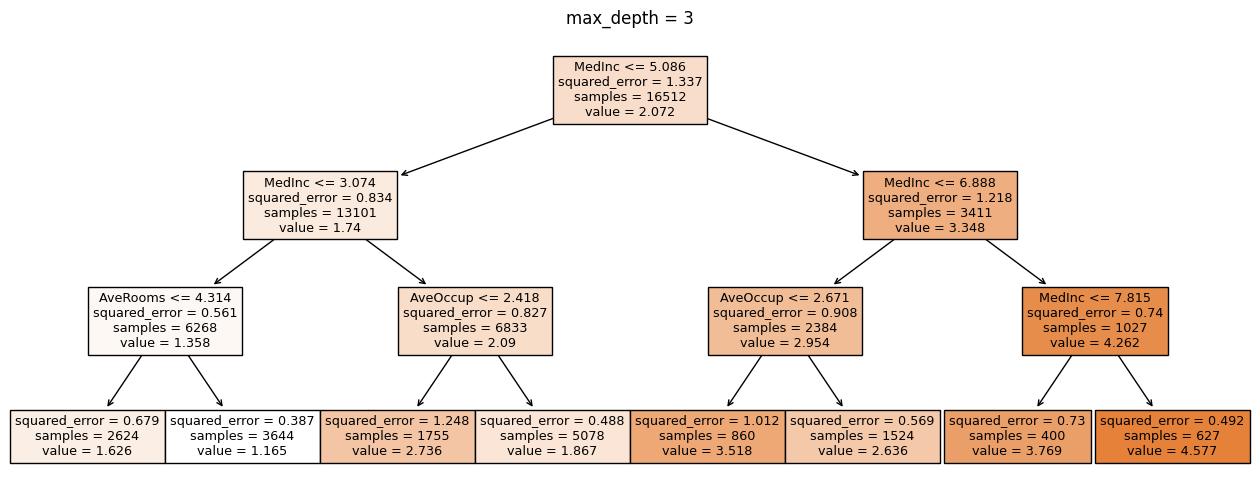

In [385]:
depth = 3

reg = get_tree(X_train, y_train, depth)
get_plot(reg, depth, df_housing.columns, (16, 6))

In [386]:
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 0.5378979887726012
test: 0.5097629887358219


Для max_depth = 3 значение метрики уже 0.51.

## 7.3. max_depth = [4, 5, 6, 7, 8, 9, 10, 15, None]

In [387]:
depths = [4, 5, 6, 7, 8, 9, 10, 15, None]

for depth in depths:
  reg = get_tree(X_train, y_train, depth)
  print(f'max_depth = {depth}\ntrain: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}\n')

max_depth = 4
train: 0.5886585082002127
test: 0.5540288505085005

max_depth = 5
train: 0.6376786573648903
test: 0.5997321244428706

max_depth = 6
train: 0.6782454652473255
test: 0.6205125146233951

max_depth = 7
train: 0.716697558789222
test: 0.6515700686011479

max_depth = 8
train: 0.7601733883178261
test: 0.6779284983766045

max_depth = 9
train: 0.7999255297501255
test: 0.6832529836308363

max_depth = 10
train: 0.8347775350789697
test: 0.6829476865157171

max_depth = 15
train: 0.9606559003268663
test: 0.6460087986104097

max_depth = None
train: 1.0
test: 0.622075845135081



Визуализация таких деревьев уже будет нечитабельной, поэтому можно сравнить только оценки качества моделей.

При max_depth > 5 уже можно увидеть факт переобучения (score train значительно больше score test).

При max_depth = None (inf) score для обучающей выборки равен 1 - модель отлично запомнила значения целевой переменной, а вот на тренировочных данных средне справилась с предсказанием.

Оптимальным значением max_depth в данном случае можно считать 5.

## 7.4. Оптимизация параметра min_samples_leaf

Для подбора значений минимального количества элементов в дочерних узлах после разделения вершины можно попробовать округлить значение MedHouseVal, сначала до целого, затем до десятых.

Это позволит узнать минимальное количество строк с округленным значением. Например, некоторые значения MedHouseVal без округления указаны только в какой-то одной строке:

In [388]:
y.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedHouseVal, Length: 3842, dtype: int64

In [389]:
msl = 1
reg = get_tree(X_train, y_train, msl=msl)
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 1.0
test: 0.622075845135081


При min_samples_leaf = 1 значение метрики аналогично варианту max_depth = None (т.к. это значения по умолчанию).

Округление до целого:

In [390]:
msl = min(round(y).value_counts())
msl

210

In [391]:
reg = get_tree(X_train, y_train, msl=msl)
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 0.6716790163507601
test: 0.6335055446811578


In [392]:
reg.get_depth()

9

Округление до десятых:

In [393]:
msl = min(round(y, 1).value_counts())
msl

4

In [394]:
reg = get_tree(X_train, y_train, msl=msl)
print(f'train: {reg.score(X_train, y_train)}\ntest: {reg.score(X_test, y_test)}')

train: 0.9273097538929191
test: 0.6827115001908219


При округлении целевой переменной до десятых модель переобучается.

При округлении целевой переменной до целого min_samples_leaf становится равным 210. Такое значение параметра показывает хорошие результаты оценки работы модели на тестовых (0.63) и тренировочных данных (0.67).

Это очень похоже на вариант `max_depth=6, min_samples_leaf=1`, только разница между train score и test score для варианта `max_depth=None, min_samples_leaf=210` немного меньше.



# 8. Выводы

В итоге можно выделить 3 модели:

1. `LinearRegression()`

- train score = 0.6
- test score = 0.58

2. `DecisionTreeRegressor(max_depth=5, min_samples_leaf=1)`

- train score = 0.64
- test score = 0.6

3. `DecisionTreeRegressor(max_depth=None, min_samples_leaf=210)` (на самом деле при таком значении параметра min_samples_leaf глубина равна 9)

- train score = 0.67
- test score = 0.63

Дерево решений дает немного лучшие результаты работы модели. Здесь важно правильно подобрать значения параметров.

Например, большое значение max_depth может привести к переобучению и увеличению необходимых для вычисления ресурсов. А маленькое значение в min_samples_leaf - к увеличению max_depth.